In [26]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd

import tensorflow as tf
from tensorflow import keras

In [27]:
print(tf.__version__)

2.2.0


In [28]:
print(keras.__version__)

2.3.0-tf


# Data Acquisition

In [29]:
fashion_mnist = keras.datasets.fashion_mnist

(x_train_full,y_train_full),(x_test,y_test) = fashion_mnist.load_data()

print(x_train_full.shape)
print(y_train_full.shape)
print(x_test_full.shape)
print(y_test_full.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [30]:
x_train,x_valid,y_train,y_valid = x_train_full[5000:],x_train_full[:5000],y_train_full[5000:],y_train_full[:5000]

print(x_train.shape)
print(x_valid.shape)
print(x_test.shape)

print(y_train.shape)
print(y_valid.shape)
print(y_test.shape)

(55000, 28, 28)
(5000, 28, 28)
(10000, 28, 28)
(55000,)
(5000,)
(10000,)


# Data Preprocessing

In [31]:
x_train,x_valid,x_test = x_train/255.,x_valid/255.,x_test/255.

# ANN Model

In [32]:
model = keras.Sequential([
                          #Flatten Layer
                          tf.keras.layers.Flatten(input_shape = (28,28)),
                          
                          #Fully Connected Layers
                          tf.keras.layers.Dense(512,activation='relu'),
                          tf.keras.layers.Dense(256,activation='relu'),
                          tf.keras.layers.Dense(128,activation='relu'),

                          #Output Layer
                          tf.keras.layers.Dense(10,activation='softmax')
])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________
None


In [33]:
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'sgd',
              metrics = ['accuracy'])

In [34]:
history = model.fit(x_train,y_train,
                    epochs = 25,
                    validation_data = (x_valid,y_valid))

Epoch 1/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.7043 - accuracy: 0.7683 - val_loss: 0.4836 - val_accuracy: 0.8334
Epoch 2/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4702 - accuracy: 0.8340 - val_loss: 0.4479 - val_accuracy: 0.8398
Epoch 3/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4217 - accuracy: 0.8513 - val_loss: 0.4233 - val_accuracy: 0.8472
Epoch 4/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3921 - accuracy: 0.8617 - val_loss: 0.3748 - val_accuracy: 0.8744
Epoch 5/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3700 - accuracy: 0.8698 - val_loss: 0.3703 - val_accuracy: 0.8708
Epoch 6/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3518 - accuracy: 0.8745 - val_loss: 0.4509 - val_accuracy: 0.8242
Epoch 7/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3363 - accuracy: 0.8790 - val_loss: 0.3319 - val_accuracy:

In [39]:
print(history.params)

{'verbose': 1, 'epochs': 25, 'steps': 1719}


In [40]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


In [41]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


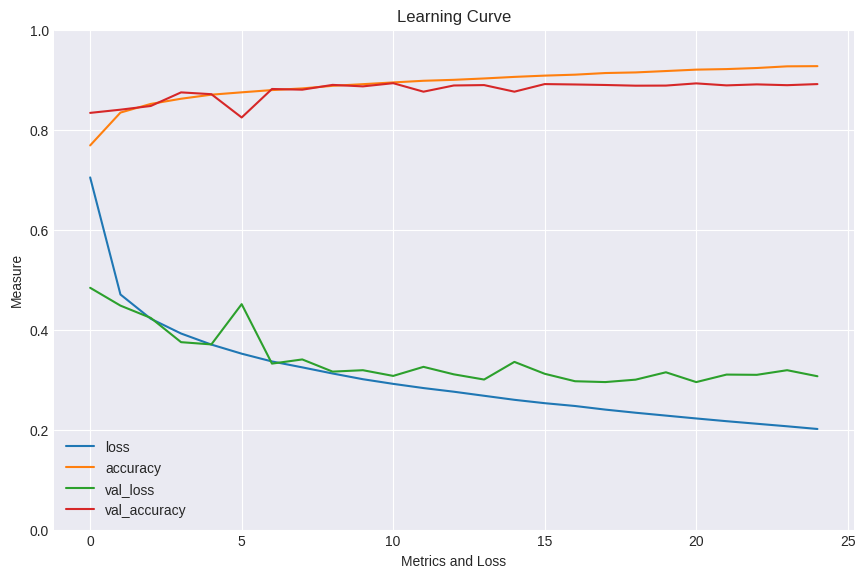

In [42]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (8,5),dpi = 100)
ax = fig.add_axes([1,1,1,1])
pd.DataFrame(history.history).plot(ax =ax)
ax.set(xlabel = 'Metrics and Loss',ylabel = 'Measure',title = 'Learning Curve')
ax.set_ylim(0,1);

In [43]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3449 - accuracy: 0.8778


[0.3449036478996277, 0.8777999877929688]